In [1]:
from mist import MIST
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import seaborn as sns

/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sc.settings.set_figure_params(dpi=100, frameon=True, figsize=(4, 4), facecolor='white')
sns.set_style('ticks')

In [2]:
tcr_path = ['/home/Laiwp/10XImmudex/donor1/vdj_v1_hs_aggregated_donor1_all_contig_annotations.csv',
        '/home/Laiwp/10XImmudex/donor2/vdj_v1_hs_aggregated_donor2_all_contig_annotations.csv',
        '/home/Laiwp/10XImmudex/donor3/vdj_v1_hs_aggregated_donor3_all_contig_annotations.csv',
        '/home/Laiwp/10XImmudex/donor4/vdj_v1_hs_aggregated_donor4_all_contig_annotations.csv']

rna_path = ['/home/Laiwp/10XImmudex/donor1/vdj_v1_hs_aggregated_donor1_filtered_feature_bc_matrix.h5',
        '/home/Laiwp/10XImmudex/donor2/vdj_v1_hs_aggregated_donor2_filtered_feature_bc_matrix.h5',
        '/home/Laiwp/10XImmudex/donor3/vdj_v1_hs_aggregated_donor3_filtered_feature_bc_matrix.h5',
        '/home/Laiwp/10XImmudex/donor4/vdj_v1_hs_aggregated_donor4_filtered_feature_bc_matrix.h5']

batch = ['donor1','donor2','donor3','donor4']

In [3]:
adata, model = MIST(rna_path=rna_path,tcr_path=tcr_path, batch=batch, rna_data_type='h5',tcr_data_type='10X', type='joint',outdir='/home/Laiwp/test/',
                    batch_size=256,lr=0.0001,weight_decay=0.001,max_epoch=300,patience=30,warmup=30)

/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarn

Raw adata shape: (237883, 33538)
Raw adata_tcr shape: (193656, 0)
Filtering TCR
Processed scTCR-seq shape: (138653, 0)
Processing scRNA-seq data
Filtering cells and genes


/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Concat RNA and TCR
Normalize and log1p per cell


/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Finding HVG and maxabs scaling
Processed adata shape: (132090, 2000)
Model training


/home/Laiwp/MIST/mist/model/performer_attention.py:92: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2349.)
  q, r = torch.qr(unstructured_block.cpu(), some = True)
Epochs: 100%|██████████| 300/300 [8:40:15<00:00, 104.05s/it, scRNA_recon_loss=162.202,scTCR_recon_loss=12.125,kl_loss=18.663,penalty_loss=0.039,rna_pcc=0.723,bv_acc=0.851,bj_acc=0.784,cdr3b_acc=0.880,av_acc=0.864,aj_acc=0.752,cdr3a_acc=0.878]  

Encode latent
eval mode


eval mode
eval mode
Clustering


In [7]:
adata = sc.read_h5ad('/home/Laiwp/test/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 132090 × 2000
    obs: 'IR_VDJ_1_c_call', 'IR_VDJ_1_consensus_count', 'IR_VDJ_1_d_call', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_1_j_call', 'IR_VDJ_1_junction', 'IR_VDJ_1_junction_aa', 'IR_VDJ_1_locus', 'IR_VDJ_1_productive', 'IR_VDJ_1_v_call', 'IR_VDJ_2_productive', 'IR_VJ_1_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_1_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_1_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_1_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_productive', 'batch', 'chain_pairing', 'extra_chains', 'has_ir', 'high_confidence', 'is_cell', 'multi_chain', 'n_genes', 'receptor_subtype', 'receptor_type', 'joint_cluster', 'gex_cluster'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'gex', 'hvg', 'joint', 'leiden', 'log1p', 'pca', 'raw', 'tcr', 'umap'
    obsm: 'X_gex_umap', 'X_joint_umap', 'X_pca', 'X_raw_umap', 'X_tcr_umap', 'X_umap', 'la

In [18]:
# from mist.model import VAE_Multi
# batchs = len(adata.obs['batch'].cat.categories)
# model = VAE_Multi(x_dims=2000, pooling_dims=16,
#                       z_dims=128, batchs=batchs,
#                         aa_size=21, aa_dims=64, max_len=30, 
#                         bv_size=73, bj_size=15,
#                         av_size=55, aj_size=62, 
#                         gene_dims=48, drop_prob=0.1,weights=None)
# model = model.double()

In [8]:
model.load_model('/home/Laiwp/test/model.pt')

In [73]:
model

VAE_Multi(
  (RNAencoder): encoder_scRNA(
    (self): SelfAttention(
      (fast_attention): FastAttention(
        (kernel_fn): ReLU()
      )
      (to_q): Linear(in_features=1, out_features=16, bias=False)
      (to_k): Linear(in_features=1, out_features=16, bias=False)
      (to_v): Linear(in_features=1, out_features=16, bias=False)
      (to_out): Linear(in_features=16, out_features=1, bias=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (fc): Linear(in_features=2000, out_features=1024, bias=True)
    (fc_mu): Linear(in_features=1024, out_features=128, bias=True)
    (fc_var): Linear(in_features=1024, out_features=128, bias=True)
    (bn): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (RNAdecoder): decoder_scRNA(
    (pooling): AdaptiveAvgPool1d(output_size=16)
    (fc): Linear(in_features=16, out_features=2000, bias=True)
    (bn): DSBN1d(
      (bns): ModuleList(
        (0): BatchNorm1d(2000, eps=1e-05, 

/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


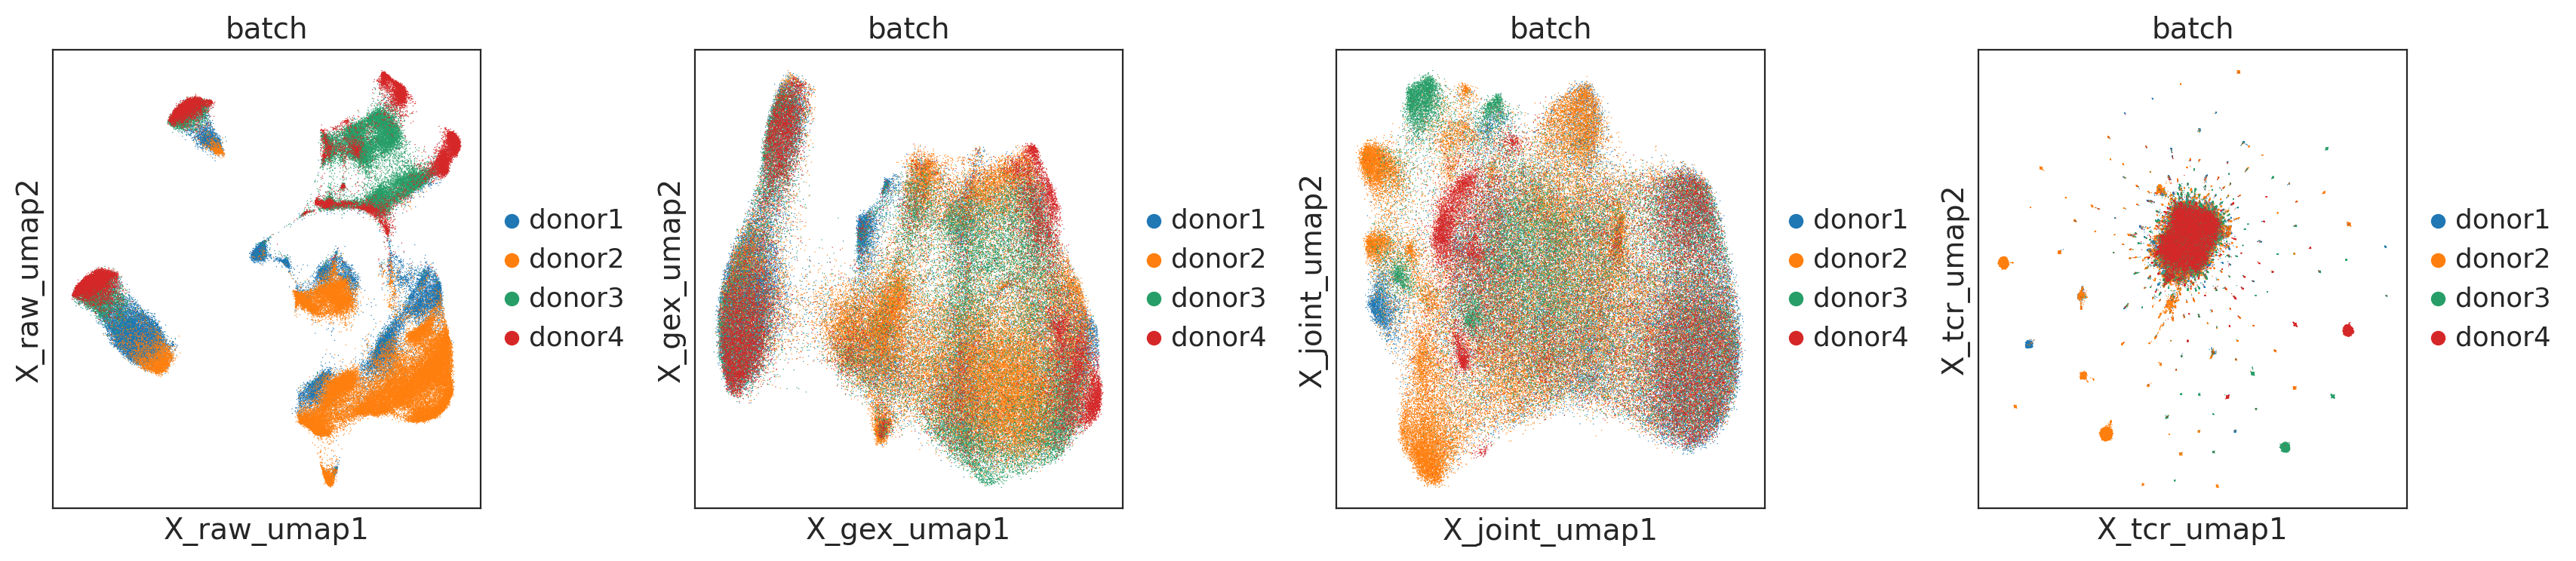

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
ax1_dict = sc.pl.embedding(adata,basis='X_raw_umap', color=['batch'],  ax=ax1, show=False)
ax2_dict = sc.pl.embedding(adata,basis='X_gex_umap', color=['batch'],  ax=ax2, show=False)
ax3_dict = sc.pl.embedding(adata,basis='X_joint_umap', color=['batch'],  ax=ax3, show=False)
ax4_dict = sc.pl.embedding(adata,basis='X_tcr_umap', color=['batch'],  ax=ax4, show=False)

/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


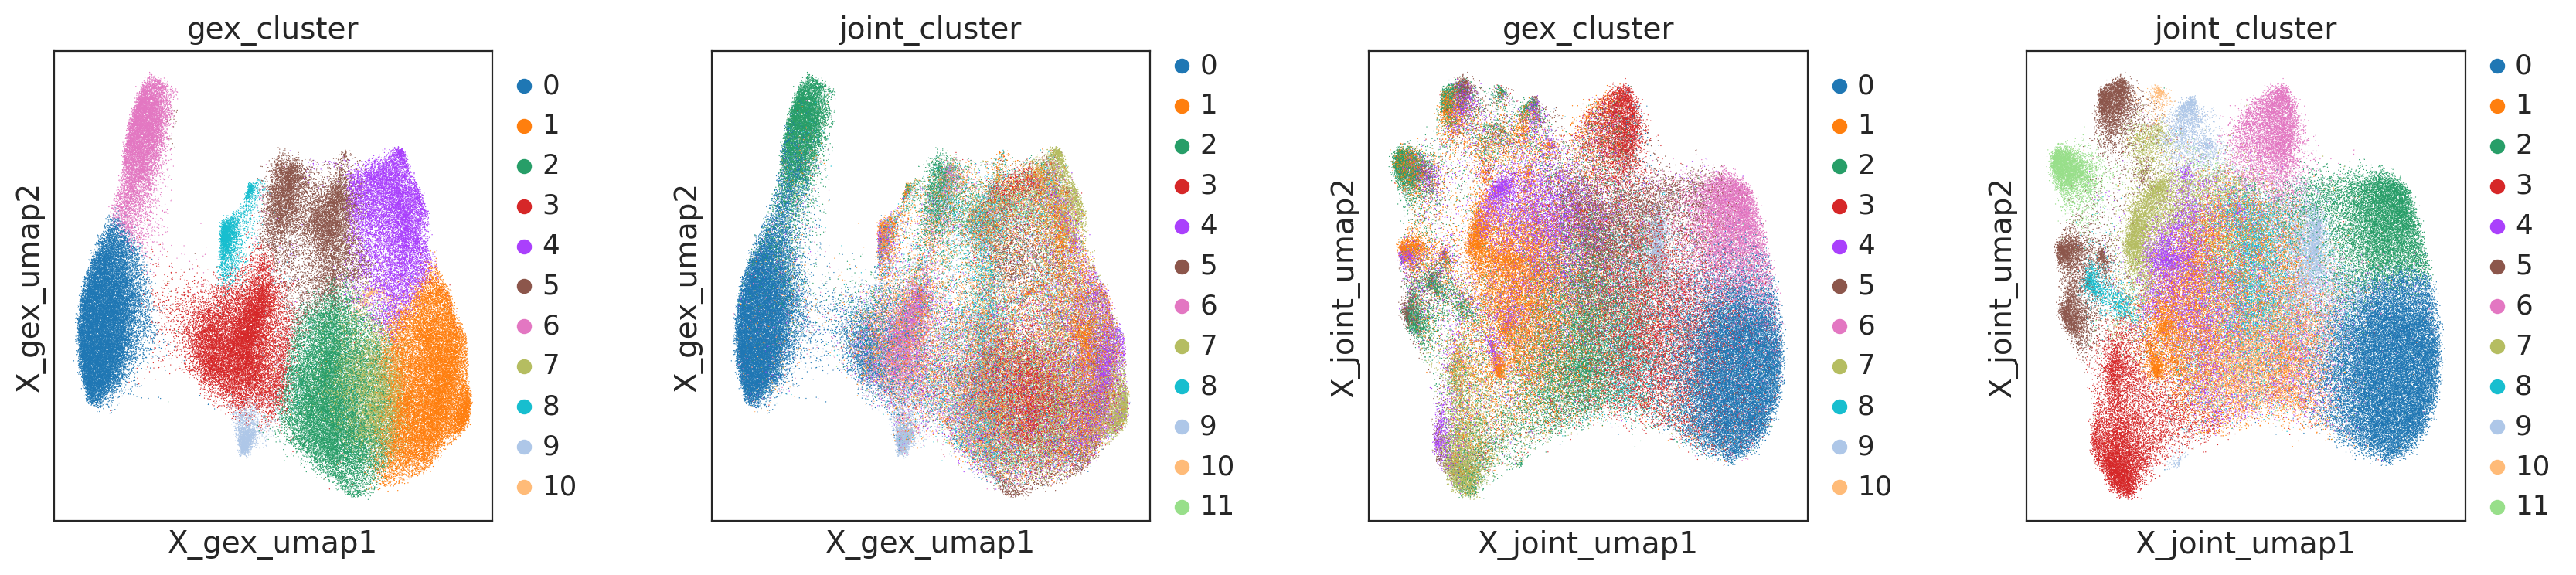

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
ax1_dict = sc.pl.embedding(adata,basis='X_gex_umap', color=['gex_cluster'],  ax=ax1, show=False)
ax2_dict = sc.pl.embedding(adata,basis='X_gex_umap', color=['joint_cluster'],  ax=ax2, show=False)
ax3_dict = sc.pl.embedding(adata,basis='X_joint_umap', color=['gex_cluster'],  ax=ax3, show=False)
ax4_dict = sc.pl.embedding(adata,basis='X_joint_umap', color=['joint_cluster'],  ax=ax4, show=False)

In [9]:
attn_weigth_celltype = model.celltype_attn_weight(adata, Celltype='gex_cluster', n_samples=256, device='cuda')

In [10]:
from mist import remove_redundant_genes

In [11]:
outs1 = remove_redundant_genes(attn_weigth_celltype, min_occurrence=0.25, top=100)
print(outs1.shape)
df = outs1

(1868, 11)


In [12]:
top_genes = []
number = 5
for col in df.columns:
    top_genes.extend(df[col].nlargest(number).index)

top_genes_sorted = sorted(set(top_genes), key=lambda x: [df[col].nlargest(number).index.tolist().index(x) if x in df[col].nlargest(number).index else float('inf') for col in df.columns])
filtered_df = df.loc[top_genes_sorted]

/home/Laiwp/miniconda3/envs/mist/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


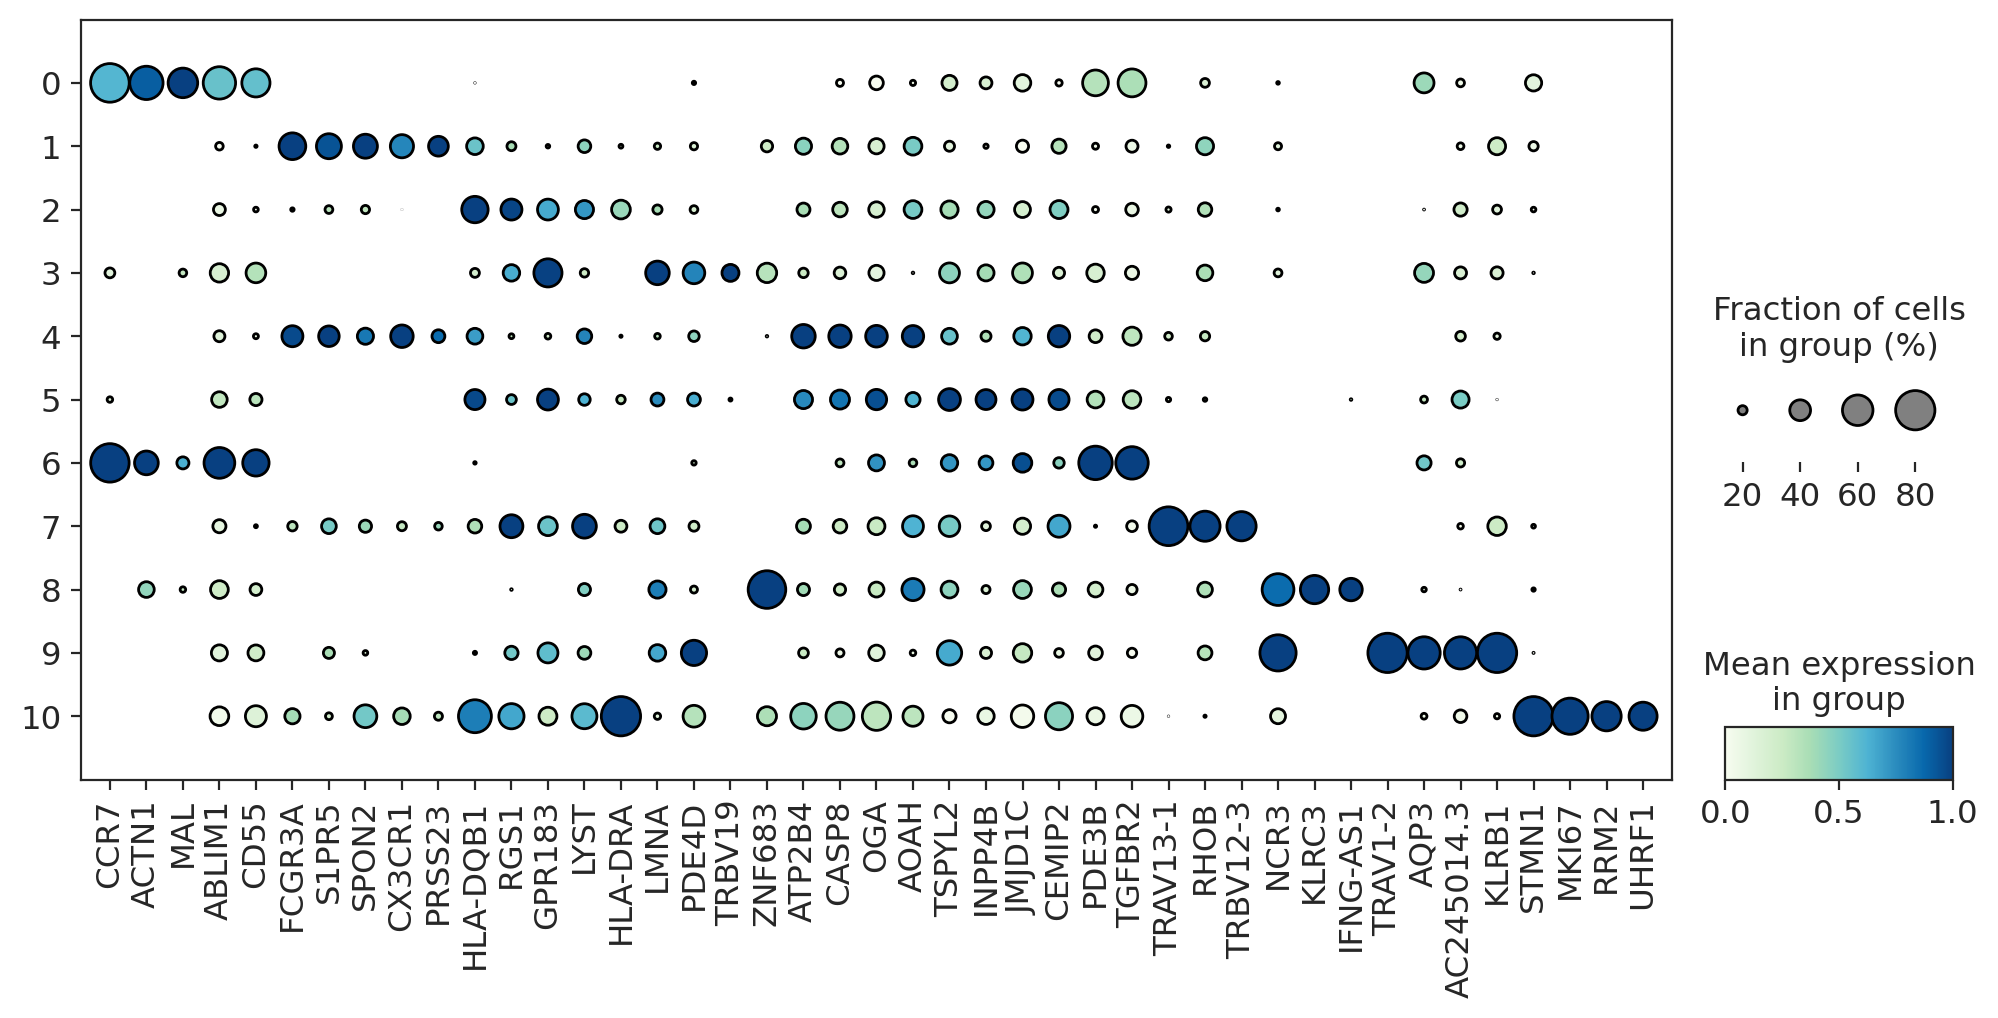

In [14]:
g=sc.pl.dotplot(adata,top_genes_sorted, groupby='gex_cluster',
                standard_scale='var',
                swap_axes=False, #cmap='GnBu',
                figsize=(12,5),return_fig=True)
g.style(cmap='GnBu', dot_edge_color='black', dot_edge_lw=1,dot_min=.1,dot_max=.8)
g.show()

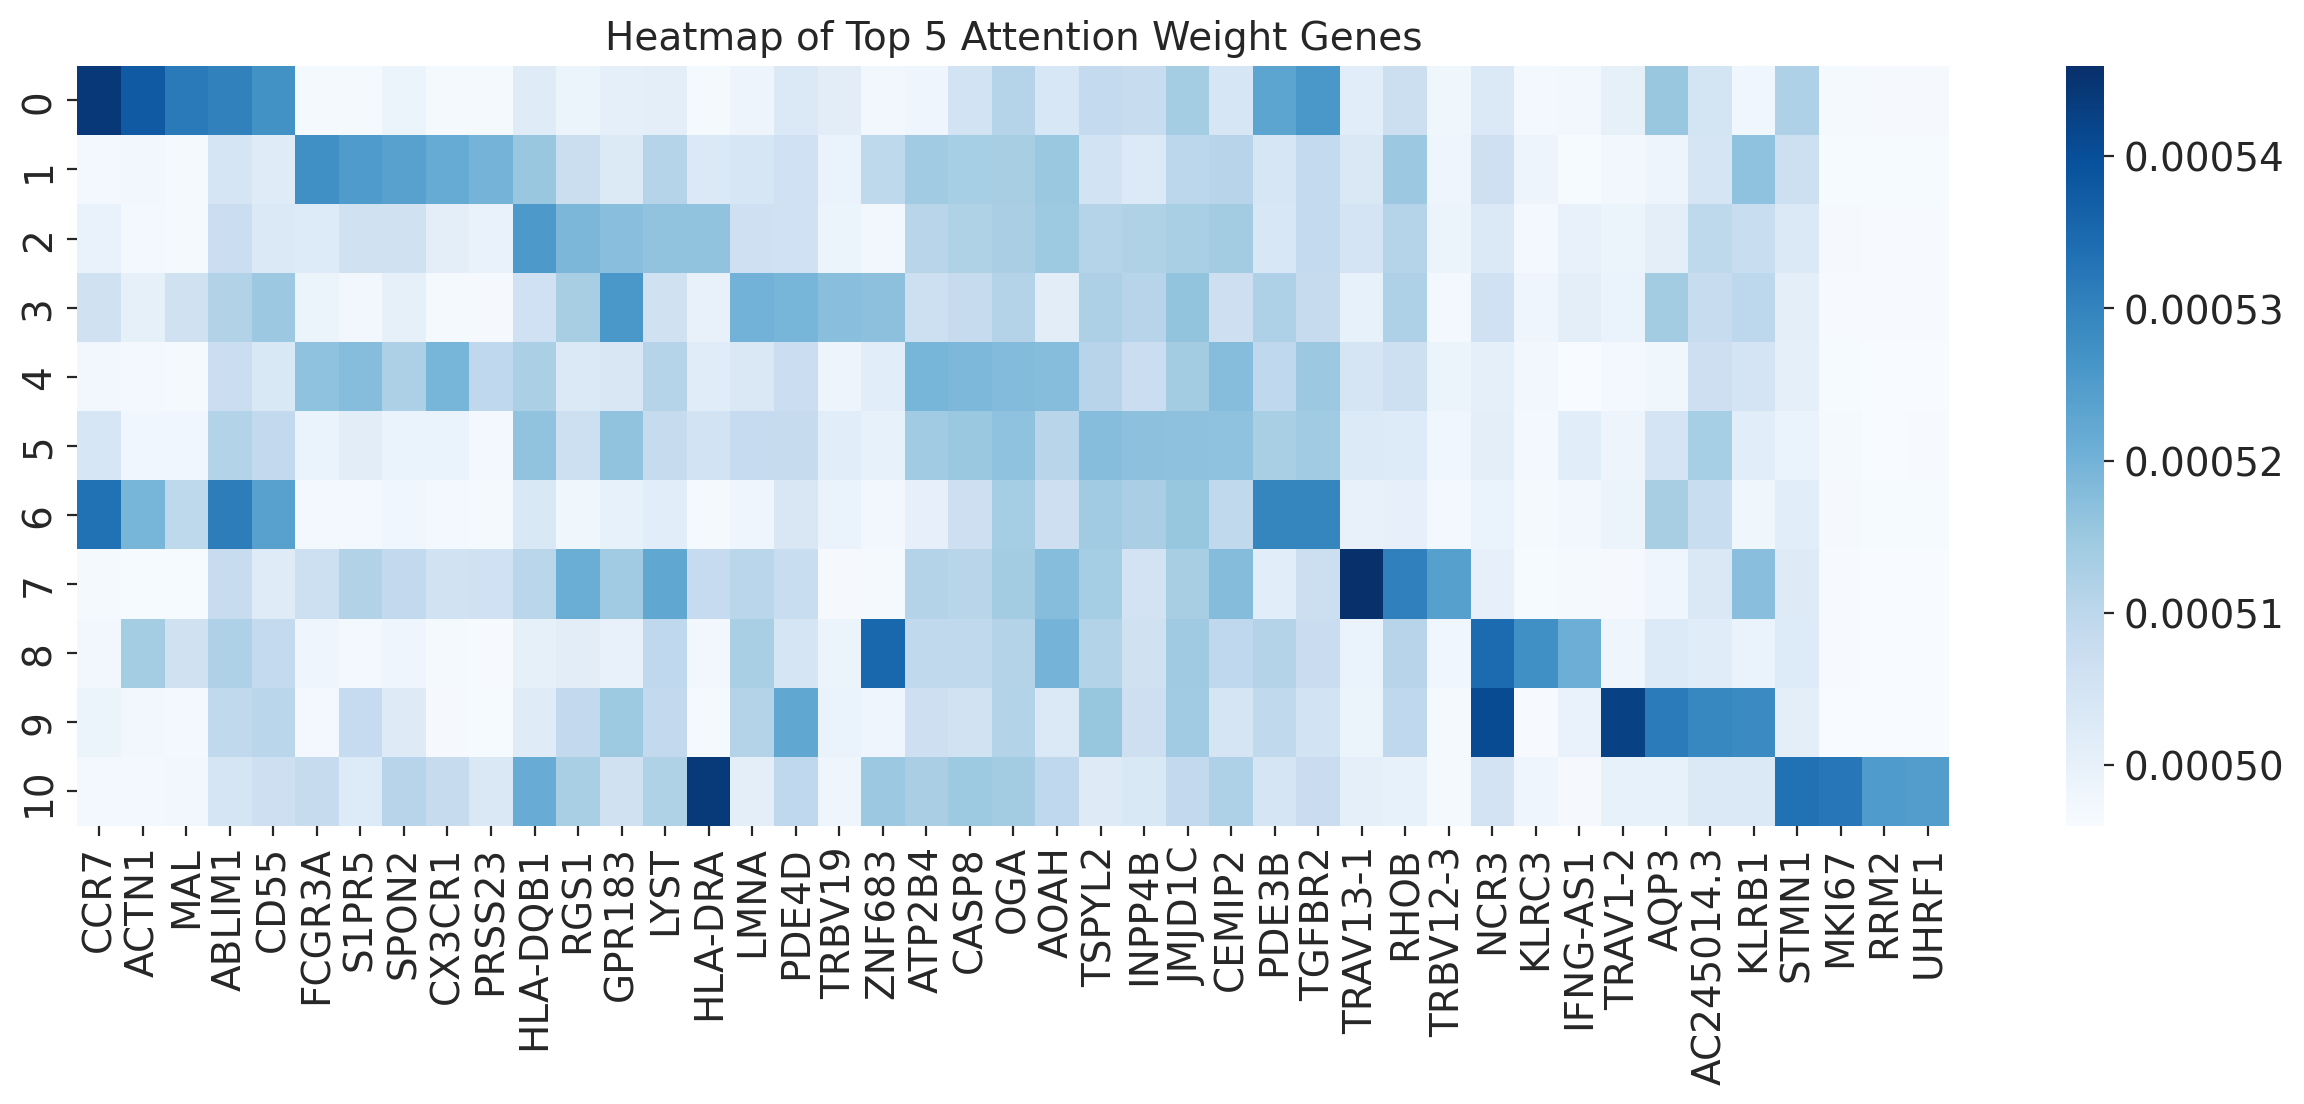

In [17]:
plt.figure(figsize=(15, 5))  # 设置图形大小
sns.heatmap(filtered_df.T, cmap='Blues',annot_kws={"size": 4})  # 绘制热图，选择合适的颜色映射（colormap）
plt.title('Heatmap of Top 5 Attention Weight Genes')  # 设置标题
plt.xlabel('')  # 设置 x 轴标签
plt.ylabel('')  # 设置 y 轴标签
plt.show()  # 显示图形

In [19]:
attn_weigth_df = model.gene_attn_weight(adata[adata.obs.groupby('batch').sample(n=10000,random_state=42).index], 
                                             n_samples=128, device='cuda')

In [60]:
attn_weigth_df1 = remove_redundant_genes(attn_weigth_df, min_occurrence=0.1,top=50)
attn_weigth_df1 = attn_weigth_df1.loc[:,attn_weigth_df1.index]
print(attn_weigth_df1.shape)

(1950, 1950)


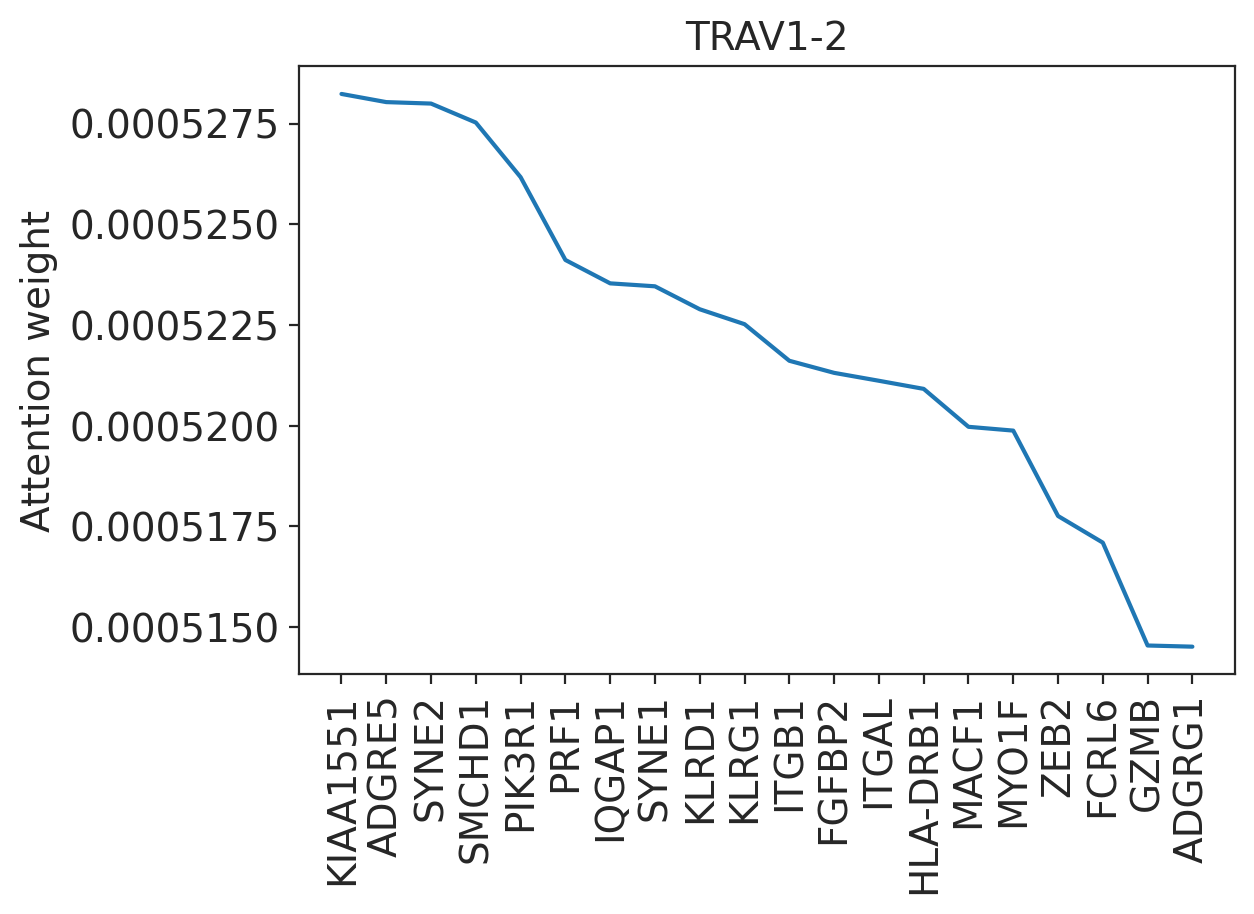

In [61]:
TRAV1_2_index = attn_weigth_df1.nlargest(20, 'TRAV1-2').index
with rc_context({'figure.figsize': (6, 4)}):
    plt.plot(attn_weigth_df1.loc['TRAV1-2',TRAV1_2_index].sort_values(ascending=False))
    plt.xticks(rotation=90) 
    plt.ylabel('Attention weight')
    plt.title('TRAV1-2')
    plt.show()

In [64]:
import torch
import pandas as pd
aa_dict = {
        'X': 0,
        'A': 1, 'R': 2, 'N': 3, 'D': 4, 'C': 5,
        'Q': 6, 'E': 7, 'G': 8, 'H': 9, 'I': 10,
        'L': 11, 'K': 12, 'M': 13, 'F': 14, 'P': 15,
        'S': 16, 'T': 17, 'W': 18, 'Y': 19, 'V': 20,
        "Z": 21,
    }
aa_index = torch.tensor([range(1,21)],device='cuda',dtype=torch.long)
aa_embed = model.aa_embed(aa_index,device='cuda')
aa_df = pd.DataFrame(aa_embed,index=list(aa_dict.keys())[1:21])

In [65]:
aa_group =  {'G':'Polar', 'S':'Polar', 'T':'Polar', 'Y':'Polar', 'C':'Polar', 
            'N':'Neutral', 'Q':'Neutral', 
            'K':'Basic', 'R':'Basic', 'H':'Basic',
            'D':'Acidic', 'E':'Acidic', 
            'P':'Hydrophobic', 'A':'Hydrophobic', 'W':'Hydrophobic', 'F':'Hydrophobic', 'L':'Hydrophobic', 'I':'Hydrophobic', 'M':'Hydrophobic', 'V':'Hydrophobic'}

aa_color = {
    'Polar':'#009e73','Neutral':'#703be7','Basic':'#0072b2','Acidic':'#d55e00','Hydrophobic':'#f0e442'
}           


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=42)
aa_embed_pca =pca.fit_transform(aa_embed)
aa_embed_pca_df = pd.DataFrame(aa_embed_pca,index=list(aa_dict.keys())[1:21])
aa_embed_pca_df['aa'] = aa_embed_pca_df.index.tolist()
aa_embed_pca_df['group'] = [aa_group[i] for i in aa_embed_pca_df.aa.tolist()]

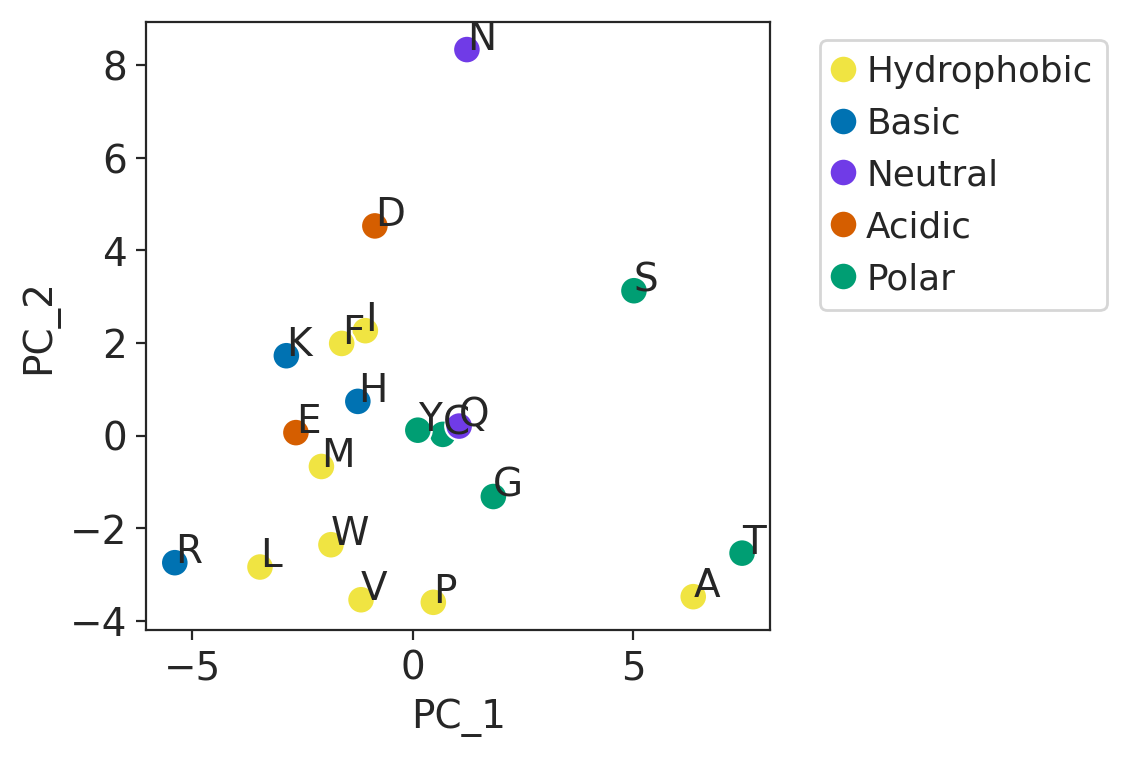

In [71]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=aa_embed_pca_df, x=aa_embed_pca_df[0], y=aa_embed_pca_df[1], hue="group", s=100, palette=aa_color)

for i in range(20):
    plt.annotate(aa_embed_pca_df.aa[i], xy = (aa_embed_pca_df[0][i], aa_embed_pca_df[1][i]), 
                 xytext = (aa_embed_pca_df[0][i]+0.00, aa_embed_pca_df[1][i]+0.00))
    
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()